In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df = df.drop(['PassengerId'], axis=1)

In [5]:
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [6]:
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='median')
embarked_imputer = SimpleImputer(strategy='most_frequent')

df['Age'] = age_imputer.fit_transform(np.array(df[['Age']]).reshape(-1, 1))
df['Embarked'] = embarked_imputer.fit_transform(np.array(df['Embarked']).reshape(-1, 1)).ravel()

In [7]:
df['Cabin_Missing'] = df['Cabin'].isnull().astype(int)
df = df.drop(['Cabin'], axis=1)

In [8]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_embarked = encoder.fit_transform(df[['Embarked']])

encoded_df = pd.DataFrame(encoded_embarked, columns=encoder.get_feature_names_out(['Embarked']))

df = pd.concat([df, encoded_df], axis=1)
df = df.drop(columns=['Embarked'])

df.head()

C:\Users\91942\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_Missing,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,0.0,0.0,1.0


In [10]:
from sklearn.model_selection import train_test_split

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Missing', 'Embarked_Q', 'Embarked_S', 'Embarked_C']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
pd.crosstab(df['Survived'], df['Sex'], normalize='columns') * 100

Sex,0,1
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


## Over Sampling

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

## SVM Model

In [14]:
from sklearn.svm import SVC

svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred), accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.75      0.84      0.79        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179
 0.8156424581005587


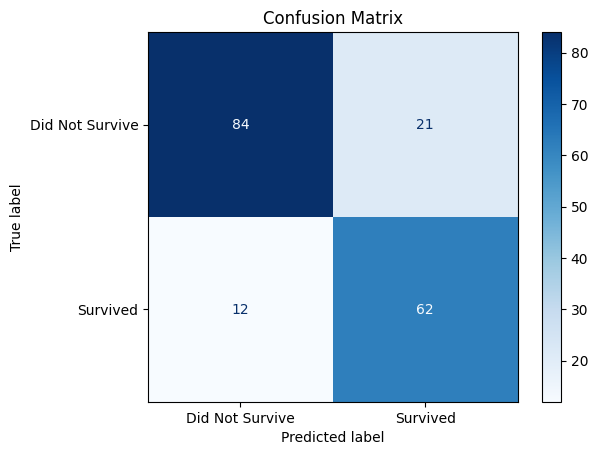

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived'])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=42, n_estimators=300)
rfc_model.fit(X_train, y_train)

y_pred = rfc_model.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       105
           1       0.75      0.81      0.78        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179



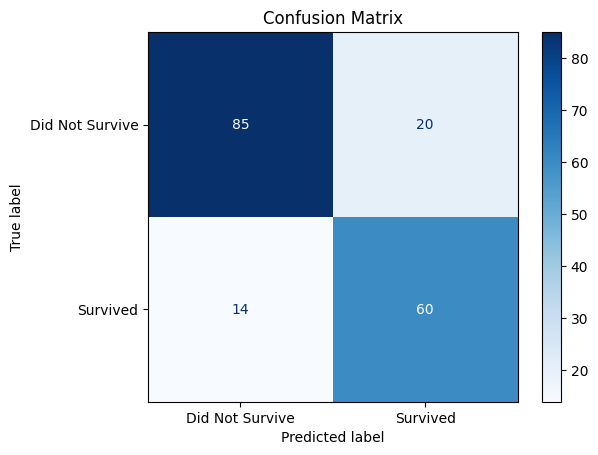

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived'])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       105
           1       0.67      0.78      0.72        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       105
           1       0.70      0.81      0.75        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



## Getting Predictions on test set

In [34]:
test_df = pd.read_csv('test.csv')

In [35]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Transform data for missing values and encode categorical attributes

In [36]:
fare_imputer = SimpleImputer(strategy='most_frequent')

test_df['Age'] = age_imputer.fit_transform(np.array(test_df['Age']).reshape(-1, 1))
test_df['Fare'] = fare_imputer.fit_transform(np.array(test_df['Fare']).reshape(-1, 1))

test_df['Cabin_Missing'] = test_df['Cabin'].isnull().astype(int)
test_df = test_df.drop(['Cabin'], axis=1)

test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})

encoded_embarked = encoder.transform(test_df[['Embarked']])

encoded_df = pd.DataFrame(encoded_embarked, columns=encoder.get_feature_names_out(['Embarked']))

test_df = pd.concat([test_df, encoded_df], axis=1)
test_df = test_df.drop(columns=['Embarked'])

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_Missing,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,1,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,1,0.0,0.0,1.0


## Scale Dataset

In [37]:
X_actual_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Missing', 'Embarked_Q', 'Embarked_S', 'Embarked_C']]

X_actual_test = scaler.transform(X_actual_test)

## Get predicitons

In [38]:
y_actual_pred = svm_model.predict(X_actual_test)

In [40]:
output = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_actual_pred
})

output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
output.to_csv('predictions.csv', index=False)